In [1]:
import pandas as pd

In [4]:
ds_path = r".\data\GermanyUsedCars.zip"
dfo = pd.read_csv(ds_path, index_col=0)
dfo.columns

Index(['brand', 'model', 'color', 'registration_date', 'year', 'price_in_euro',
       'power_kw', 'power_ps', 'transmission_type', 'fuel_type',
       'fuel_consumption_l_100km', 'fuel_consumption_g_km', 'mileage_in_km',
       'offer_description'],
      dtype='object')

In [21]:
dfo.columns

Index(['brand', 'model', 'color', 'registration_date', 'year', 'price_in_euro',
       'power_kw', 'power_ps', 'transmission_type', 'fuel_type',
       'fuel_consumption_l_100km', 'fuel_consumption_g_km', 'mileage_in_km',
       'offer_description'],
      dtype='object')

### Data Cleansing

In [38]:
df = (dfo.assign(year_e = pd.to_numeric(dfo.year, errors='coerce'))
      
)
# suppress records with invalid year 
df = df.loc[~((df.year_e.isna()) | (df.year_e > 2023)) ]
df = df.assign(years_in_service = 2023-df.year_e)
df = df.assign(price_in_euro = pd.to_numeric(dfo.price_in_euro, errors='coerce'))

<Axes: title={'center': 'Number of used Cars by manufacture year'}, xlabel='Manufacture Year'>

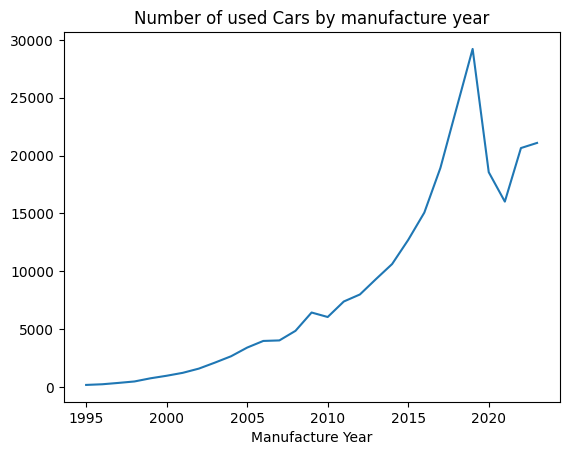

In [26]:
# df.year_e.value_counts()
# df.years_in_service.value_counts().sort_index().plot(title="Number of used Cars by Years-In-Service")
# df.year_e.value_counts().sort_index().plot(title="Number of used Cars by manufacture year", xlabel='Manufacture Year')


### Working 

In [41]:
# dfo.head()
# dfo.brand.value_counts()
# dfo[['year', 'registration_date']].head()
# df = dfo.assign(year_e = pd.to_numeric(dfo.year, errors='coerce'))
# df = dfo.assign(years_in_service = 2023-pd.to_numeric(dfo.year, errors='coerce'))
# dfo.year.astype(int, errors='ignore') - 2023
df[['brand', 'year_e', 'price_in_euro']].groupby(['brand', 'year_e']).mean()
# 2023 - dfo.year.astype(int, errors='ignore')
# df.head()
# df.years_on_service
# df.years_in_service = 2023 - df.years_in_service
# df = df.loc[df.years_in_service >= 0]
# df[['year', 'year_e']].value_counts()
# df[['year']].value_counts()


price_in_euro
brand      year_e               
alfa-romeo 1995.0    9250.000000
           1996.0    7456.000000
           1997.0   13426.235294
           1998.0    5019.714286
           1999.0    5475.937500
...                          ...
volvo      2019.0   34790.951932
           2020.0   41352.417832
           2021.0   47843.649616
           2022.0   53252.604278
           2023.0   60842.702290

[968 rows x 1 columns]

In [35]:
# pd.to_numeric(dfo.year, errors='coerce').value_counts()
pd.to_numeric(df.price_in_euro, errors='raise').value_counts().sort_index()
